# Multi-Class Classification

> When two or more than two classes as an option, it is known as **multi-class classification**
>
> - This means if you have three different classes, it's multi-class classification.
>
> - It also means if you have three classes, it's also multi-class classification.
>
> To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.


In [244]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import itertools

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print(f"Training Samples:\n{train_data[0]}\n")
print(f"Training Labels:\n{train_labels[0]}\n")

Training Samples:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
# Check the shape of the Training data

train_data[0].shape, train_labels[0].shape

((28, 28), ())

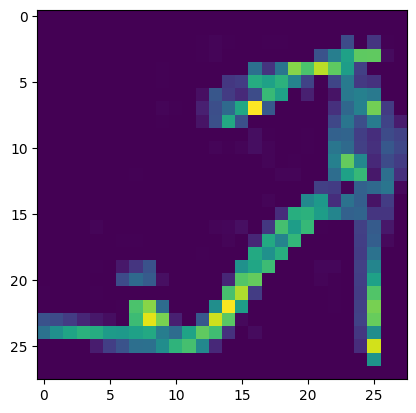

In [5]:
# Plot a single image

plt.imshow(train_data[8])

In [6]:
# Check out samples label

train_labels[8] 

# 5 ---> means it is sandal

5

In [7]:
classes_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [8]:
# Create a function to visualize our sample data

def plot_image(train_data = train_data,
               train_labels = train_labels,
               classes_name = classes_name,
               index_of_choice = 0):
    
    """
        Fucntion to viusalize image

    """
    
    plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
    plt.title(classes_name[train_labels[index_of_choice]])
    plt.axis(False)


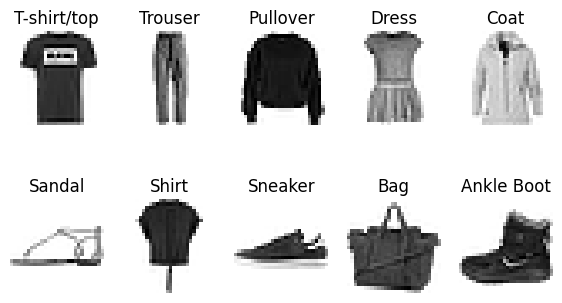

In [9]:
# Plot different examples

plt.figure(figsize = (7, 4))
plt.subplot(2, 5, 1)
plot_image(index_of_choice = 1)
plt.subplot(2, 5, 2)
plot_image(index_of_choice = 195)
plt.subplot(2, 5, 3)
plot_image(index_of_choice = 7)
plt.subplot(2, 5, 4)
plot_image(index_of_choice = 3)
plt.subplot(2, 5, 5)
plot_image(index_of_choice = 19)
plt.subplot(2, 5, 6)
plot_image(index_of_choice = 133)
plt.subplot(2, 5, 7)
plot_image(index_of_choice = 56)
plt.subplot(2, 5, 8)
plot_image(index_of_choice = 6)
plt.subplot(2, 5, 9)
plot_image(index_of_choice = 2455)
plt.subplot(2, 5, 10)
plot_image(index_of_choice = 0)

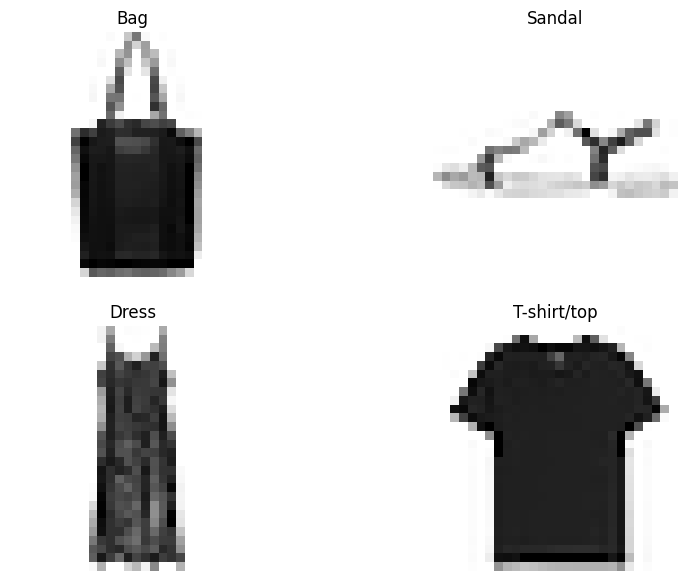

In [32]:
# Plot multiple random images of fashion mnist

plt.figure(figsize = (10, 7))

for i in range(4):
    
    plt.subplot(2, 2, i + 1)
    random_index = random.choice(range(len(train_data)))
    plot_image(index_of_choice = random_index)

> ### Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture of our binary classifiers, however, we're going to tweak a few things:

- Input Shape = 28 x 28 (The shape of the image)
- Output Shape = 10 (One per class)
- Output layer activation function = `softmax` instead of `sigmoid`
- Loss Function = `tf.keras.losses.CategoricalCrossentropy()` instead of `BinaryCrossentropy()`
  - If your labels are one-hot encoded use `CategoricalCrossentropy()`.
  - If your labels are integer use `SparseCategoricalCrossentropy()`.


In [11]:
# set random seed

tf.random.set_seed(42)

#                   1. Create Model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])



#                   2. Compile Model

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # use Sparse with loss function if it is not one-hot encoded
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])



#                   3. Fit Model

history_1 = model_1.fit(train_data, 
                        train_labels, 
                        epochs = 10, 
                        validation_data = (test_data, test_labels))

c:\Users\Muhammad Abu Bakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1010 - loss: 2.6693 - val_accuracy: 0.1061 - val_loss: 2.2908
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1127 - loss: 2.2739 - val_accuracy: 0.1367 - val_loss: 2.2230
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1398 - loss: 2.2087 - val_accuracy: 0.2330 - val_loss: 1.8764
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2227 - loss: 1.8333 - val_accuracy: 0.2574 - val_loss: 1.7338
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2463 - loss: 1.7350 - val_accuracy: 0.2741 - val_loss: 1.7039
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2639 - loss: 1.6915 - val_accuracy: 0.2793 - val_loss: 1.6601
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2654 - loss: 1.6720 - val_accuracy: 0.2998 - val_loss: 1.6221
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2977 - loss: 1.6166 - 

In [12]:
model_1.evaluate(test_data, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3303 - loss: 1.5292


[1.5221645832061768, 0.335099995136261]

In [13]:
# Min and Max value of the training data

train_data.min(), train_data.max()

(0, 255)

##### Neural networks prefer data to be scaled (or normalized), this means they like to have numbers in the tensor they try to find patterns between zero and one.


In [14]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
# Now our data is normalized, Let's build a model to find patterns in it

# set seed

tf.random.set_seed(42)


#                   1. Create Model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])



#                   2. Compile Model

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])



#                   3. Fit Model

history_2 = model_2.fit(train_data_norm, 
                        train_labels,
                        epochs = 10,
                        validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2664 - loss: 1.8392 - val_accuracy: 0.4303 - val_loss: 1.2753
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4602 - loss: 1.2439 - val_accuracy: 0.4743 - val_loss: 1.1818
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4914 - loss: 1.1654 - val_accuracy: 0.5164 - val_loss: 1.1411
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5417 - loss: 1.1168 - val_accuracy: 0.5577 - val_loss: 1.0787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5730 - loss: 1.0471 - val_accuracy: 0.5797 - val_loss: 1.0328
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5872 - loss: 1.0094 - val_accuracy: 0.5875 - val_loss: 1.0110
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5925 - loss: 0.9935 - val_accuracy: 0.5891 - val_loss: 0.9999
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5954 - loss: 0.9845 - 

In [16]:
model_2.evaluate(test_data_norm, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5845 - loss: 0.9973


[0.9890005588531494, 0.5924999713897705]

> 🔑 **NOTE** Neural Networks tend to prefer data in numerical form as well as scaled/normalized (numbers between in 0 and 1).


Text(0.5, 1.0, 'Normalized')

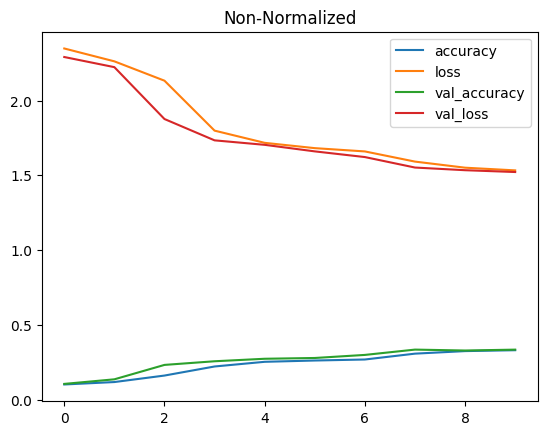

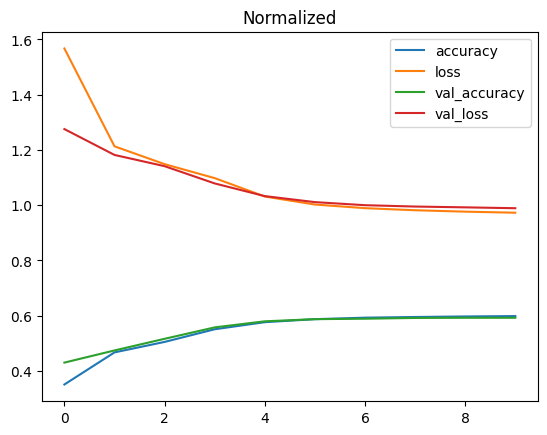

In [17]:
pd.DataFrame(history_1.history).plot()
plt.title("Non-Normalized")

pd.DataFrame(history_2.history).plot()
plt.title("Normalized")

> 🔑 **Note:** The same model with even _slightly_ different data can produce _daramatically_ different result. So when you are compairing models,
>
> It's important to make sure you are compairing them on the same criteria :e.g.
>
> - Same architecture but different data
>
> OR
>
> - Same data but different architecture.


### Finding the ideal learning rate.


In [18]:
# Set random seed

tf.random.set_seed(42)

#           1. Create Model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = "softmax")
])



#           2. Compile Model

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


# For ideal learning rate

learning_rate = tf.keras.callbacks.LearningRateScheduler(lambda epochs : 1e-3 * 10 ** (epochs/20))


#           3. Fit Model

history_3 = model_3.fit(train_data_norm,
                        train_labels,
                        epochs = 40,
                        validation_data = (test_data_norm, test_labels),
                        callbacks = [learning_rate])

c:\Users\Muhammad Abu Bakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3671 - loss: 1.6862 - val_accuracy: 0.5053 - val_loss: 1.1996 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5149 - loss: 1.1730 - val_accuracy: 0.5298 - val_loss: 1.1280 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5457 - loss: 1.1060 - val_accuracy: 0.6395 - val_loss: 0.9662 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6876 - loss: 0.9181 - val_accuracy: 0.7133 - val_loss: 0.8582 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7083 - loss: 0.8213 - val_accuracy: 0.7142 - val_loss: 0.7974 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7154 - loss: 0.7751 - val_accuracy: 0.7315 - val_loss: 0.7829 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7253 - l

In [19]:
lrs = 1e-3 * (10 ** (tf.range(40)/20))
lrs

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509])>

Text(0.5, 1.0, 'Learning Rate VS Loss')

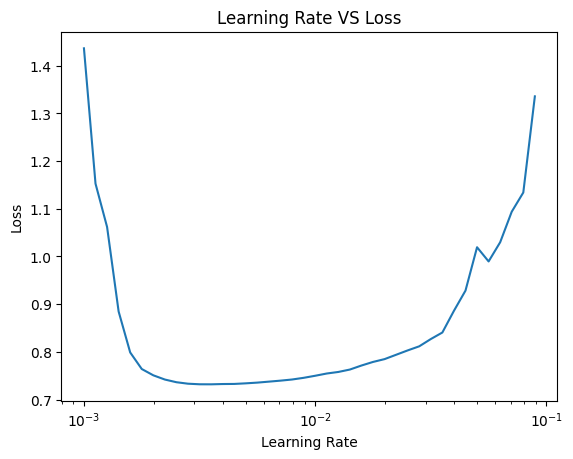

In [20]:
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate VS Loss")

### Confusion Matrix


In [21]:
# let's refit the model with ideal learning rate

# Set random seed

tf.random.set_seed(42)


#               1. Create Model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])



#               2. Compile Model

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])



#               3. Fit Model

history_4 = model_4.fit(train_data_norm,
                        train_labels,
                        epochs = 40,
                        validation_data = (test_data_norm, test_labels))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4475 - loss: 1.4212 - val_accuracy: 0.7509 - val_loss: 0.6857
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7702 - loss: 0.6485 - val_accuracy: 0.7826 - val_loss: 0.6143
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7966 - loss: 0.5895 - val_accuracy: 0.7943 - val_loss: 0.5907
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8062 - loss: 0.5633 - val_accuracy: 0.7981 - val_loss: 0.5785
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8109 - loss: 0.5483 - val_accuracy: 0.8024 - val_loss: 0.5707
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8152 - loss: 0.5386 - val_accuracy: 0.8049 - val_loss: 0.5666
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8178 - loss: 0.5314 - val_accuracy: 0.8060 - val_loss: 0.5645
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8192 - loss: 0.5254 - 

<Axes: >

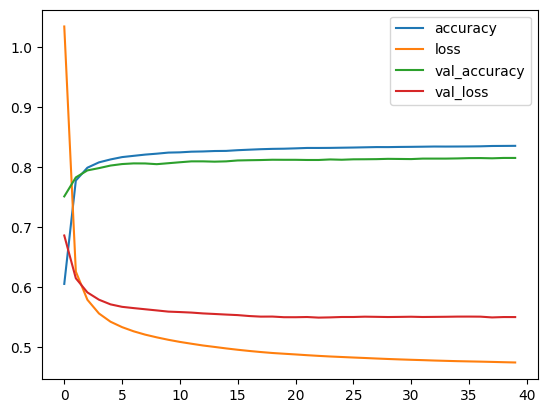

In [22]:
pd.DataFrame(history_4.history).plot()

### Evaluating our multi-class classification model

To evaluate our Multi-Class Classification model we could:

- Evaluate it's performance using other classification metrics(such as confusion metrics).

- Assess some of it's predictions (through visulaizations).

- Improve it's results (by training it for longer or changing the architecture)

- Save and export it for use in application.

let,s go through the `Top 2`


In [23]:
# Creating function for the ploting the confusion matrix

def make_confusion_matrix(y_true,
                          y_pred,
                          classes = None,
                          figsize = (10, 10),
                          text_size = 15):

    # Create confusion Matrix

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
    n_classes = cm.shape


    # Let's prettify it 

    fig, ax = plt.subplots(figsize = figsize)

    # Create a matrix plot

    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # set labels to be classes

    if classes:
        labels = classes

    else:
        labels = np.arange(cm.shape[0])

    # Label the axis

    ax.set(title = "Confusion Matrix",
           xlabel = "Predicted Label",
           ylabel = "True Label",
           xticks = np.arange(n_classes[0]),
           yticks = np.arange(n_classes[1]),
           xticklabels = labels,
           yticklabels = labels)

    # set X_axis to bottom

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for differnet colors

    threshold = (cm.max() / cm.min()) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
        horizontalalignment = "center",
        color = "white" if cm[i, j] > threshold else "black",
        size = text_size
      )

In [24]:
classes_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [25]:
# Make some predictions with our model

y_probs = model_4.predict(test_data_norm) # Probs stands for "Predictions Probability"

# view five predictions

y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.1147009e-08, 8.2717304e-26, 2.6984865e-13, 1.4417377e-12,
        1.3561754e-13, 2.6174352e-01, 1.8680257e-09, 7.8128278e-02,
        2.5823489e-05, 6.6010231e-01],
       [4.7836336e-05, 3.8082748e-10, 9.6088779e-01, 4.1300132e-06,
        7.8884130e-03, 0.0000000e+00, 3.1171801e-02, 0.0000000e+00,
        1.9855868e-09, 0.0000000e+00],
       [9.5901296e-09, 9.9962294e-01, 6.3925791e-07, 3.7622079e-04,
        2.1870164e-07, 1.8285611e-19, 1.0036616e-08, 8.1331577e-20,
        5.1180382e-15, 1.1064444e-29],
       [7.6267055e-09, 9.9962282e-01, 2.6408492e-07, 3.7676180e-04,
        1.0121319e-07, 6.8570196e-18, 5.2004054e-09, 1.8729964e-18,
        4.5476509e-15, 1.9819794e-26],
       [2.6685610e-01, 4.3136666e-07, 1.6179623e-01, 1.8504426e-02,
        1.6595144e-02, 2.9834720e-12, 5.2308947e-01, 2.3782162e-10,
        1.3158238e-02, 3.9760835e-25]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on
>
> (e.g. if your model was trained on Noramalized data, you'll have to make prediction on the normalized data).


In [26]:
# Convert all of prediction probabilities into integers.

y_preds = y_probs.argmax(axis = 1)

# View the first 10 predictions

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7], dtype=int64)

In [27]:
model_4.evaluate(test_data_norm, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8192 - loss: 0.5283


[0.5495147109031677, 0.8151000142097473]

In [28]:
model_4.evaluate(test_data_norm, y_preds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.2351


[0.23286259174346924, 1.0]

In [29]:
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[755,   1,  13, 107,   4,   1, 109,   0,  10,   0],
       [  2, 961,   5,  28,   2,   0,   1,   0,   1,   0],
       [ 10,  22, 722,  30, 144,   0,  70,   0,   2,   0],
       [ 30,  22,  24, 860,  33,   2,  26,   1,   2,   0],
       [  0,  10, 154,  38, 732,   0,  63,   0,   3,   0],
       [  1,   0,   0,   2,   0, 915,   1,  40,   8,  33],
       [153,   6, 145,  79, 140,   0, 471,   0,   6,   0],
       [  0,   0,   0,   0,   0,  41,   0, 934,   2,  23],
       [ 17,   0,   5,   6,   4,  13,  56,   5, 894,   0],
       [  0,   0,   0,   0,   0,  32,   0,  60,   1, 907]], dtype=int64)

C:\Users\Muhammad Abu Bakar\AppData\Local\Temp\ipykernel_32928\1613440732.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  threshold = (cm.max() / cm.min()) / 2


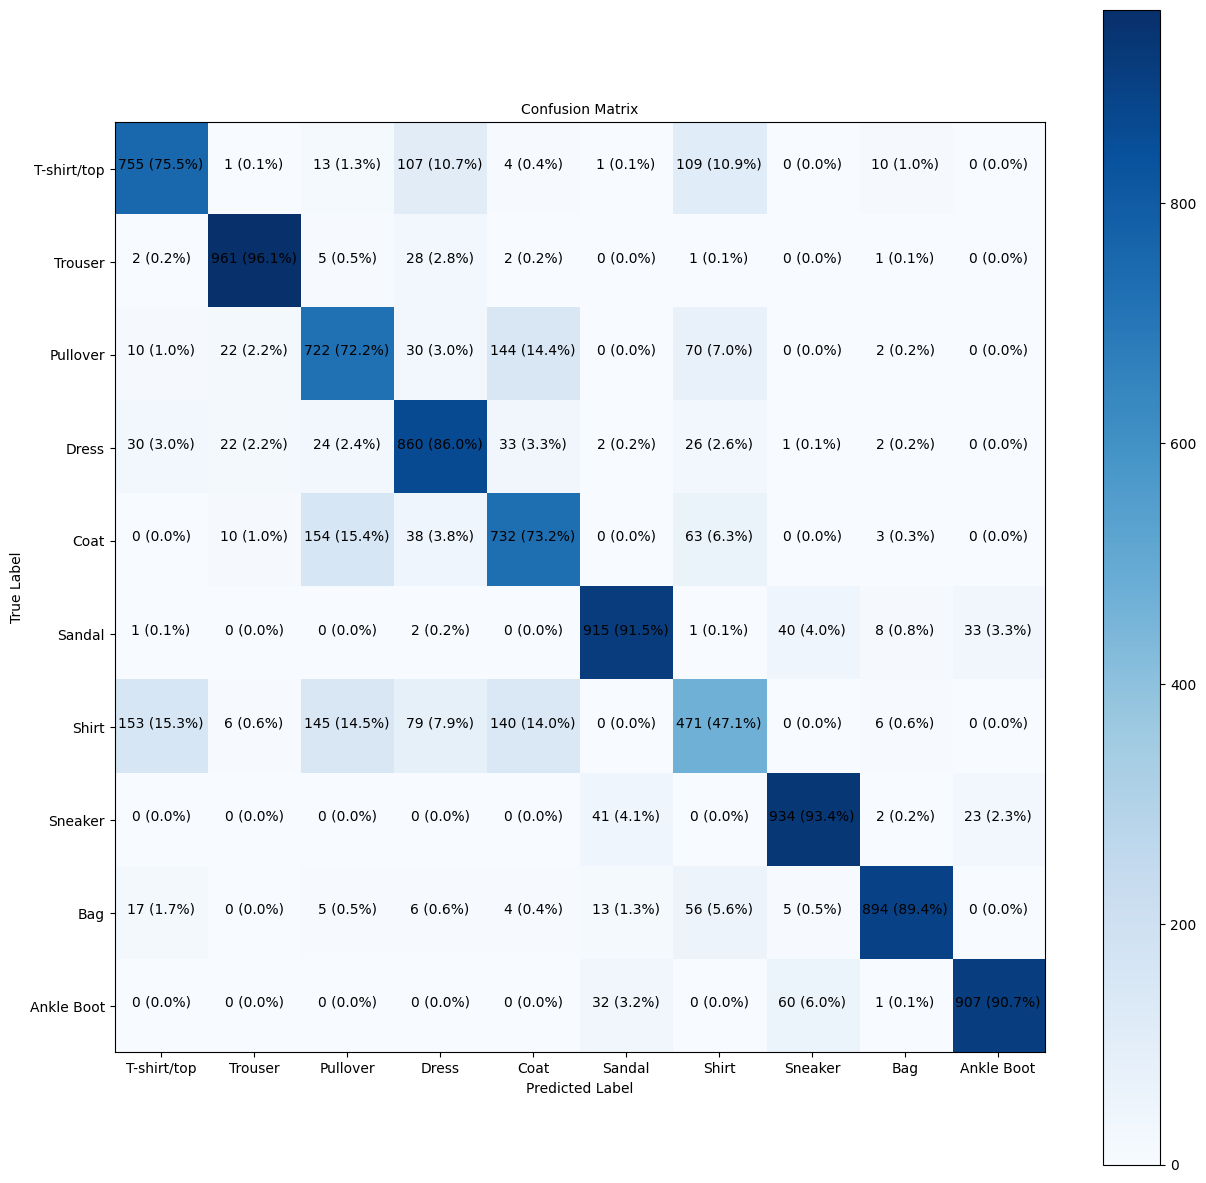

In [30]:
# Make a prettier confusion matrix

make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = classes_name,
                      figsize = (15, 15),
                      text_size = 10)

> 🔑 **NOTE:** Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop
>
> further Understanding of the data and the inputs and outputs of your models.

Now, we create function for:

- Plot a random image.

- Make a prediction on said image.

- Label the plot with the truth label & prediction label


In [213]:
def plot_random_image(model, images, classes, truth_labels):

    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """

    plt.figure(figsize = (20, 10))

    for j in range(1, 9):

        # Setup random integer

        i = random.randint(0, len(truth_labels))
        
        # Create predictions and targets

        target_image = images[i]

        pred_probs = model.predict(target_image.reshape(1, 28, 28))

        pred_labels = classes[pred_probs.argmax()]
        
        true_labels = classes[truth_labels[i]]

        # Plot the image

        plt.subplot(2, 4, j)

        plt.imshow(target_image, cmap = plt.cm.binary)

        # Change the color of the title depending on if the predicitions are right or wrong

        if pred_labels == true_labels:

            color = "green"
        else:

            color = "red"

        # Add xlabel information (Predictions/true labels)

        plt.xlabel("Pred: {} {:2.0f}% (True : {})".format(pred_labels,
                                                        100*tf.reduce_max(pred_probs),
                                                        true_labels),
                                                        color = color) # Set the color to green or red based on if predictions are right or wrong

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


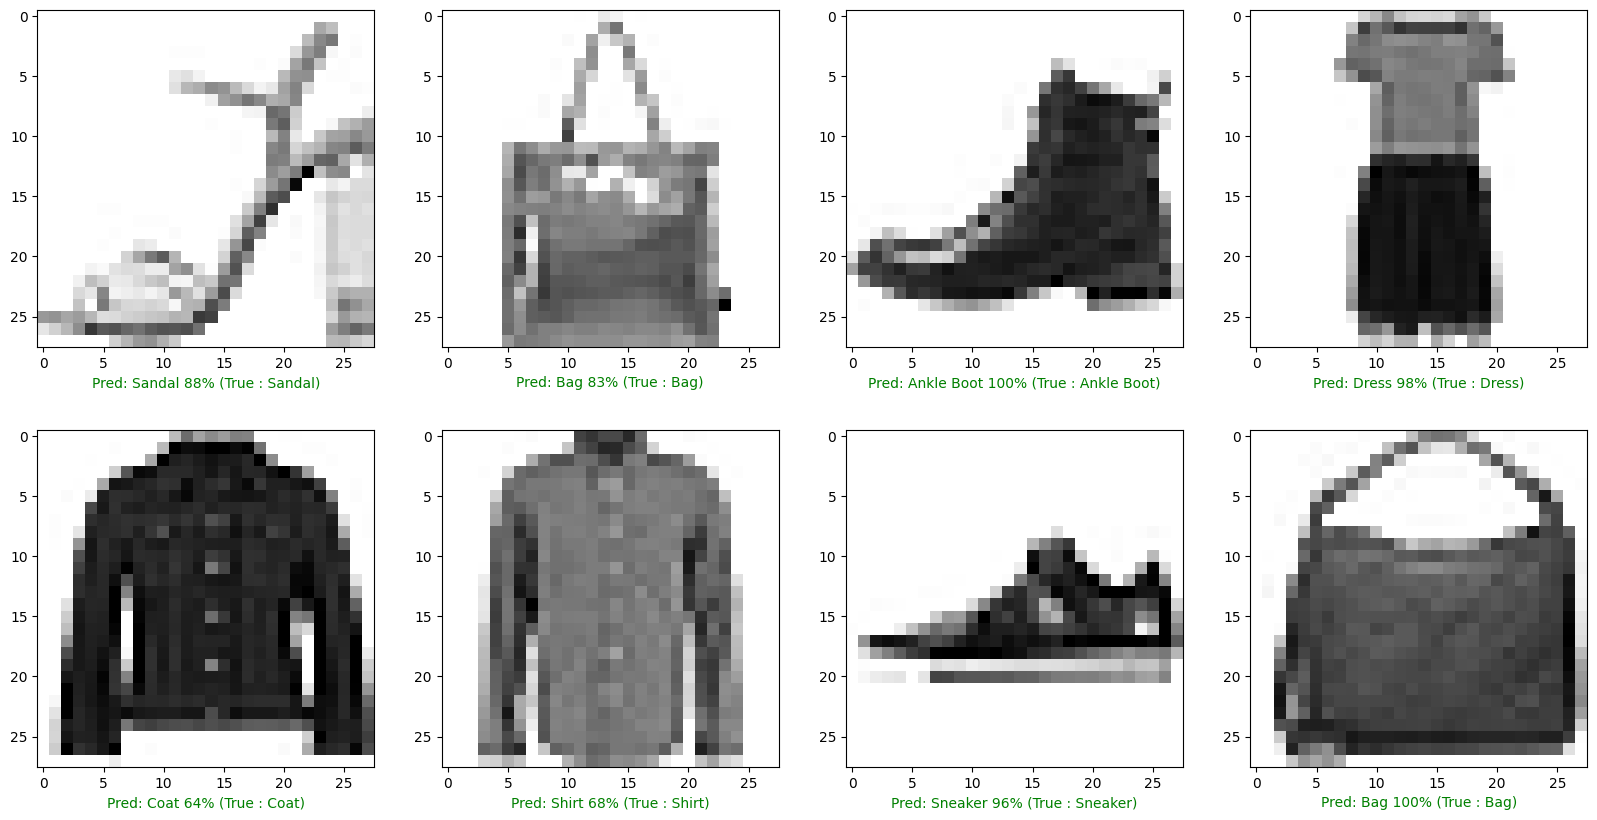

In [217]:
plot_random_image(model = model_4,
                  images = test_data_norm, # always make predictions on the same kind of data your model was trained on
                  classes = classes_name,
                  truth_labels = test_labels)

In [220]:
model_4.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [228]:
# Extract a particular layer

model_4.layers[1]

<Dense name=dense_9, built=True>

In [241]:
# Get the patterns of our layer in our network

weights, biases = model_4.layers[1].get_weights()

# Shapes

weights, weights.shape

(array([[-2.0190344 , -0.49563405,  1.646081  , -1.0571536 ],
        [ 1.184461  , -2.1439035 ,  1.367397  , -0.71696115],
        [ 0.48910043, -0.49082136,  1.6330014 , -1.8145504 ],
        ...,
        [ 0.00580249,  0.13639073,  0.46311396,  0.01656753],
        [-2.1353736 , -0.07934435,  0.2931613 , -0.0800773 ],
        [-0.9848116 , -0.94725305,  0.13293105,  0.5512665 ]],
       dtype=float32),
 (784, 4))

In [243]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

Every neuron has a bias vector. Each of those is paired with a weight matrix.

The bias vector get initialized as `Zeros` (at least in the case of `TensorFlow` Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence in the next layer.

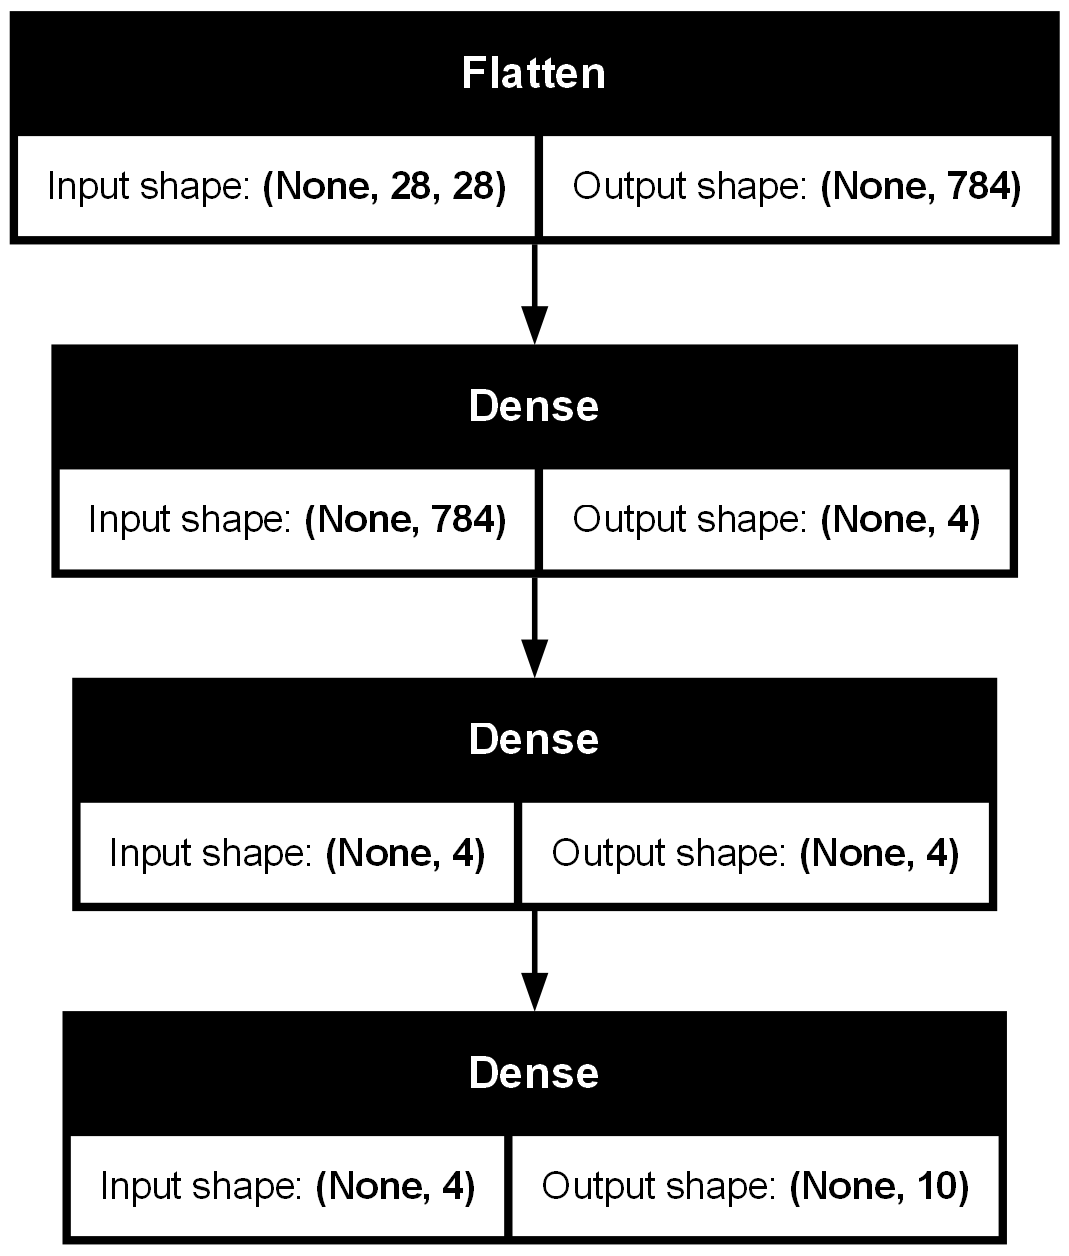

In [247]:
# See the inputs and outputs of each layer

plot_model(model_4, show_shapes = True)